1: Fake News 0: True News


In [ ]:
import numpy as np
import pandas as pd 
import re

from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# print stopwaords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# **Data Collection & per-processing**

In [ ]:
fakenews_dataset = pd.read_csv('/content/covid-19_Train.csv')

In [ ]:
fakenews_dataset.shape

(6420, 3)

In [ ]:
fakenews_dataset.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [ ]:
fakenews_dataset.std()

<ipython-input-78-c519ab529688>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fakenews_dataset.std()


id    1853.438696
dtype: float64

In [ ]:
fakenews_dataset.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [ ]:
fakenews_dataset = fakenews_dataset.drop(columns=['id'])

<Axes: xlabel='label', ylabel='count'>

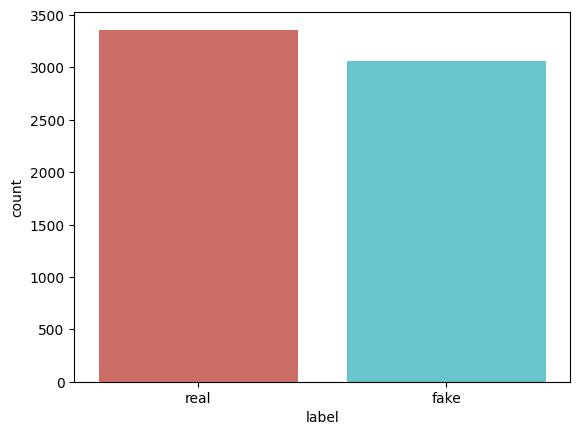

In [ ]:
#count of lable column
import seaborn as sns
sns.countplot(x='label', data=fakenews_dataset, palette='hls')

# **Stemming**

In [ ]:
#Stemming
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
fakenews_dataset['tweet'] = fakenews_dataset['tweet'].apply(stemming)

In [ ]:
print(fakenews_dataset['tweet'])

0       cdc current report death gener discrep death c...
1       state report death small rise last tuesday sou...
2       polit correct woman almost use pandem excus re...
3       indiafightscorona covid test laboratori india ...
4       popul state gener larg case count look new cas...
                              ...                        
6415      tiger test posit covid pleas stay away pet bird
6416    autopsi prove covid blood clot pneumonia ought...
6417    post claim covid vaccin alreadi develop caus w...
6418              aamir khan donat cr pm relief care fund
6419    day sinc last case covid acquir local unknown ...
Name: tweet, Length: 6420, dtype: object


# **Separating & Labeling Data**

In [ ]:
#separating the data and label
X = fakenews_dataset['tweet'].values
Y = fakenews_dataset['label'].values

In [ ]:
print(Y)

['real' 'real' 'fake' ... 'fake' 'fake' 'real']


In [ ]:
print(X)

['cdc current report death gener discrep death count differ sourc small explic death toll stand roughli peopl today'
 'state report death small rise last tuesday southern state report death http co yasgrtt ux'
 'polit correct woman almost use pandem excus reus plastic bag http co thf gunfp coronaviru nashvil'
 ... 'post claim covid vaccin alreadi develop caus widespread infertil'
 'aamir khan donat cr pm relief care fund'
 'day sinc last case covid acquir local unknown sourc total number activ case covid new zealand manag isol quarantin facil']


# **TfidfVectorizer**

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 12042)	0.24948709152248996
  (0, 12023)	0.15247075155848694
  (0, 11322)	0.22883201720223004
  (0, 11201)	0.23570185157678478
  (0, 11099)	0.25317977968762095
  (0, 10440)	0.2945982802752475
  (0, 10164)	0.12283601638079977
  (0, 9024)	0.13202937829039874
  (0, 4450)	0.22420155925475568
  (0, 3752)	0.362746779168759
  (0, 2915)	0.33503773518595825
  (0, 2868)	0.21629333661951275
  (0, 2656)	0.3933183327497672
  (0, 2489)	0.19178405593321252
  (0, 2313)	0.23740320196945142
  (0, 1658)	0.18562177454895934
  (1, 13806)	0.4183021611532609
  (1, 12732)	0.386349422639478
  (1, 12230)	0.3121574613757363
  (1, 11334)	0.2818256404118349
  (1, 11206)	0.3605522219271559
  (1, 11099)	0.29195476041530427
  (1, 10316)	0.2449181423397089
  (1, 10164)	0.28329718729572195
  (1, 6792)	0.20078852935824187
  :	:
  (6418, 9214)	0.2550319187684946
  (6418, 6492)	0.37278273238224513
  (6418, 4305)	0.3219214721249429
  (6418, 3038)	0.3791674573951937
  (6418, 2382)	0.38266592988666426
  (6418, 1575)	0.2

# **Splitting the data into Test and Train**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# **Accuracy Score**
**Logistic Regression**

In [ ]:
model_lr = LogisticRegression()

In [ ]:
model_lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy score on the training data
X_train_prediction_lr = model_lr.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction_lr, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_lr)
# accuracy score on the test data
X_test_prediction_lr = model_lr.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction_lr, Y_test)
print('Accuracy score of the test data : ',test_data_accuracy_lr)

Accuracy score of the training data :  0.9661214953271028
Accuracy score of the test data :  0.911993769470405


**DecisionTree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dtc = DecisionTreeClassifier()

In [ ]:
model_dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
# accuracy score on the training data
X_train_prediction_dtc = model_dtc.predict(X_train)
training_data_accuracy_dtc = accuracy_score(X_train_prediction_dtc, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_dtc)
# accuracy score on the test data
X_test_prediction_dtc = model_dtc.predict(X_test)
test_data_accuracy_dtc = accuracy_score(X_test_prediction_dtc, Y_test)
print('Accuracy score of the test data : ',test_data_accuracy_dtc)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.8769470404984424


**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_gbc = GradientBoostingClassifier(random_state=0)

In [ ]:
model_gbc.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
# accuracy score on the training data
X_train_prediction_gbc = model_gbc.predict(X_train)
training_data_accuracy_gbc = accuracy_score(X_train_prediction_gbc, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_gbc)
# accuracy score on the test data
X_test_prediction_gbc = model_gbc.predict(X_test)
test_data_accuracy_gbc = accuracy_score(X_test_prediction_gbc, Y_test)
print('Accuracy score of the test data : ',test_data_accuracy_gbc)

Accuracy score of the training data :  0.9116043613707165
Accuracy score of the test data :  0.8839563862928349


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rfc = RandomForestClassifier()

In [ ]:
model_rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# accuracy score on the training data
X_train_prediction_rfc = model_rfc.predict(X_train)
training_data_accuracy_rfc = accuracy_score(X_train_prediction_rfc, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_rfc)
# accuracy score on the test data
X_test_prediction_rfc = model_rfc.predict(X_test)
test_data_accuracy_rfc = accuracy_score(X_test_prediction_rfc, Y_test)
print('Accuracy score of the test data : ',test_data_accuracy_rfc)


Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.9291277258566978


# **Cross Valadtion**

**Logistic Regression**

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(), X, Y, cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.91744548 0.91277259 0.92367601 0.92601246 0.91433022]
91.88


**Decision Tree Classifier**

In [ ]:
cv_score_drc = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)

print(cv_score_drc)

mean_accuracy_drc = sum(cv_score_drc)/len(cv_score_drc)

mean_accuracy_drc = mean_accuracy_drc*100

mean_accuracy_drc = round(mean_accuracy_drc, 2)

print(mean_accuracy_drc)

[0.88395639 0.87383178 0.89953271 0.88161994 0.88161994]
88.41


**Gradient Boosting Classifier**

In [ ]:
cv_score_gbc = cross_val_score(GradientBoostingClassifier(), X, Y, cv=5)

print(cv_score_gbc)

mean_accuracy_gbc = sum(cv_score_gbc)/len(cv_score_gbc)

mean_accuracy_gbc = mean_accuracy_gbc*100

mean_accuracy_gbc = round(mean_accuracy_gbc, 2)

print(mean_accuracy_gbc)

[0.88707165 0.87227414 0.89641745 0.87538941 0.88317757]
88.29


**Random Forest Classifier**

In [ ]:
cv_score_rfc = cross_val_score(RandomForestClassifier(), X, Y, cv=5)

print(cv_score_rfc)

mean_accuracy_rfc = sum(cv_score_rfc)/len(cv_score_rfc)

mean_accuracy_rfc = mean_accuracy_rfc*100

mean_accuracy_rfc = round(mean_accuracy_rfc, 2)

print(mean_accuracy_rfc)

[0.92834891 0.92834891 0.94392523 0.93068536 0.91510903]
92.93


# **Confusion Matrix**


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

**Logistic Regression**

The classification report for Logistic Regression: 
               precision    recall  f1-score   support

        fake       0.85      0.92      0.88       612
        real       0.92      0.86      0.89       672

    accuracy                           0.88      1284
   macro avg       0.89      0.89      0.88      1284
weighted avg       0.89      0.88      0.88      1284



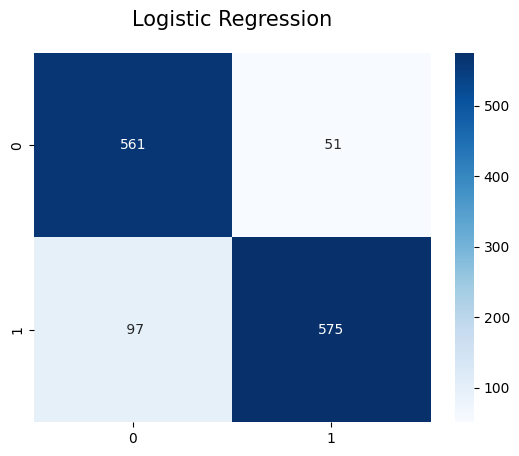

In [ ]:
import matplotlib.pyplot as plt
lr = cross_val_predict(model_lr,X_test,Y_test,cv=5)

sns.heatmap(confusion_matrix(Y_test,lr),annot=True,fmt='3.0f',cmap="Blues")

plt.title('Logistic Regression', y=1.05, size=15)
from sklearn.metrics import classification_report
print('The classification report for Logistic Regression:','\n',classification_report(Y_test,lr))

Decision Tree **Classifier**

The classification report for Decision Tree Classifier: 
               precision    recall  f1-score   support

        fake       0.80      0.80      0.80       612
        real       0.82      0.82      0.82       672

    accuracy                           0.81      1284
   macro avg       0.81      0.81      0.81      1284
weighted avg       0.81      0.81      0.81      1284



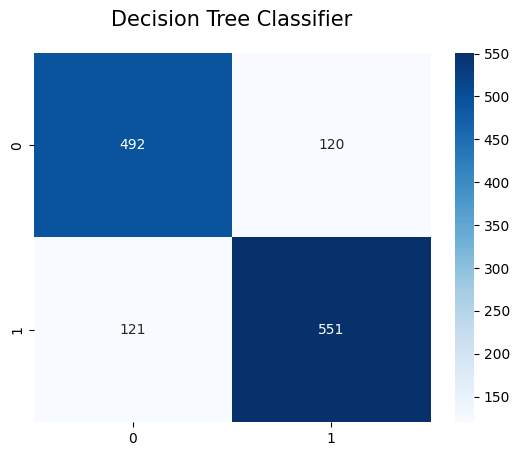

In [ ]:
import matplotlib.pyplot as plt
dtc = cross_val_predict(model_dtc,X_test,Y_test,cv=5)

sns.heatmap(confusion_matrix(Y_test,dtc),annot=True,fmt='3.0f',cmap="Blues")

plt.title('Decision Tree Classifier', y=1.05, size=15)
from sklearn.metrics import classification_report
print('The classification report for Decision Tree Classifier:','\n',classification_report(Y_test,dtc))

**Gradient Boosting Classifier**

The classification report for Gradient Boosting Classifier: 
               precision    recall  f1-score   support

        fake       0.84      0.84      0.84       612
        real       0.86      0.86      0.86       672

    accuracy                           0.85      1284
   macro avg       0.85      0.85      0.85      1284
weighted avg       0.85      0.85      0.85      1284



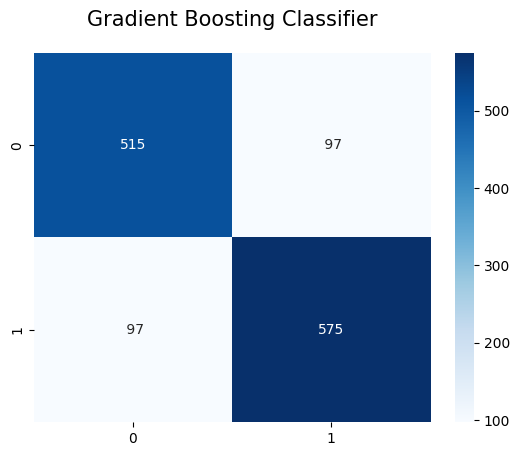

In [ ]:
import matplotlib.pyplot as plt
gbc = cross_val_predict(model_gbc,X_test,Y_test,cv=5)

sns.heatmap(confusion_matrix(Y_test,gbc),annot=True,fmt='3.0f',cmap="Blues")

plt.title('Gradient Boosting Classifier', y=1.05, size=15)
from sklearn.metrics import classification_report
print('The classification report for Gradient Boosting Classifier:','\n',classification_report(Y_test,gbc))

**Random Forest Classifier**

The classification report for Random Forest Classifier: 
               precision    recall  f1-score   support

        fake       0.85      0.94      0.89       612
        real       0.94      0.85      0.89       672

    accuracy                           0.89      1284
   macro avg       0.89      0.89      0.89      1284
weighted avg       0.89      0.89      0.89      1284



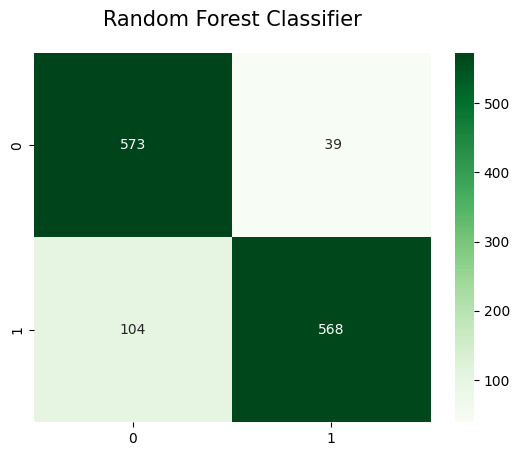

In [122]:
import matplotlib.pyplot as plt
rfc = cross_val_predict(model_rfc,X_test,Y_test,cv=5)

sns.heatmap(confusion_matrix(Y_test,rfc),annot=True,fmt='3.0f',cmap="Greens")

plt.title('Random Forest Classifier', y=1.05, size=15)
from sklearn.metrics import classification_report
print('The classification report for Random Forest Classifier:','\n',classification_report(Y_test,rfc))

# **Prediction Model**




In [ ]:
X_new = X_test[3]

prediction = model_rfc.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

['fake']
The news is Fake


In [ ]:
print(Y_test[3])

fake
